In [2]:
import os
import subprocess
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
from bs4 import BeautifulSoup

git_root = (
    subprocess.check_output(["git", "rev-parse", "--show-toplevel"], text=True)
    .strip()
)

sys.path.append(
    subprocess.check_output("git rev-parse --show-toplevel".split())
    .decode("utf-8")
    .strip()
)

from datahandler.DataHandler import DataHandler

base_dir = os.path.join(git_root, "data")
image_dir = os.path.join(git_root, "documentation", "images")

In [3]:
mdr = DataHandler("mdr")
dlf = DataHandler("dlf")

# MDR
mdr_easy_data = mdr.get_all("easy")
mdr_easy_data['source'] = 'mdr'
mdr_easy_data['niveau'] = 'easy'

mdr_hard_data = mdr.get_all("hard")
mdr_hard_data['source'] = 'mdr'
mdr_hard_data['niveau'] = 'hard'

mdr_easy_data['article'] = BeautifulSoup(" ".join(mdr_easy_data["text"].tolist()), 'lxml').get_text()
mdr_hard_data['article'] = BeautifulSoup(" ".join(mdr_hard_data["text"].tolist()), 'lxml').get_text()


# DLF
dlf_easy_data = dlf.get_all("easy")
dlf_easy_data['source'] = 'dlf'
dlf_easy_data['niveau'] = 'easy'

dlf_hard_data = dlf.get_all("hard")
dlf_hard_data['source'] = 'dlf'
dlf_hard_data['niveau'] = 'hard'

dlf_easy_data['article'] = dlf_easy_data['text']
dlf_hard_data['article'] = dlf_hard_data['text']

# JOIN ALL INTO ONE FRAME
all_data = pd.concat([mdr_easy_data, mdr_hard_data, dlf_easy_data, dlf_hard_data])
all_data['has_audio'] = all_data['audio_audio_url'].apply(lambda x : isinstance(x, str))
all_data.drop(columns=['audio_audio_url', 'audio_download_url', 'audio_duration', 'text'], inplace=True)
all_data

,title,description,kicker,date,url,image_url,image_description,match,source,niveau,article,audio,has_audio
0,Die Landes-Regierung von Sachsen will den Obst...,\nDie letzten Jahre waren sehr schwer:<br/> ...,Sachsen,2024-06-05,https://www.mdr.de/nachrichten-leicht/leichte-...,https://cdn.mdr.de/nachrichten/sachsen/frost-w...,Frostschäden an einem Weinstock.,None,mdr,easy,Die letzten Jahre waren sehr schwer: • Für ...,NaN,True
0,Ein Opfer vom Blitz-Einschlag in Dresden ist g...,\nVor einigen Wochen gab es ein Gewitter in de...,Sachsen,2024-06-05,https://www.mdr.de/nachrichten-leicht/leichte-...,https://cdn.mdr.de/nachrichten/sachsen/dresden...,Verletzte nach Blitzeinschlag in Dresden,None,mdr,easy,Die letzten Jahre waren sehr schwer: • Für ...,NaN,True
0,In Erfurt fängt ein Festival für Puppen-Theate...,"\nErfurt ist eine große Stadt in dem <a href=""...",Thüringen,2024-06-05,https://www.mdr.de/nachrichten-leicht/leichte-...,https://cdn.mdr.de/kultur/bild-37636-resimage_...,"Internationales Puppentheaterfestival Erfurt ""...",None,mdr,easy,Die letzten Jahre waren sehr schwer: • Für ...,NaN,True
0,In der Stadt Merseburg wurde eine Bombe gefunden,"\nDer Saalekreis ist ein <a href=""https://www....",Sachsen-Anhalt,2024-06-05,https://www.mdr.de/nachrichten-leicht/leichte-...,https://cdn.mdr.de/nachrichten/sachsen-anhalt/...,Eine Straße in der Merseburger Innenstadt ist ...,https://mdr.de/nachrichten/sachsen-anhalt/hall...,mdr,easy,Die letzten Jahre waren sehr schwer: • Für ...,NaN,True
0,Der Haupt-Bahnhof von Dresden ist bald für 3 T...,\nIm Haupt-Bahnhof von der Stadt Dresden gibt ...,Sachsen,2024-06-06,https://www.mdr.de/nachrichten-leicht/leichte-...,https://cdn.mdr.de/nachrichten/sachsen/dresden...,Bauarbeiten an der Kreuzungsbrücke Hauptbahnho...,https://mdr.de/nachrichten/sachsen/dresden/dre...,mdr,easy,Die letzten Jahre waren sehr schwer: • Für ...,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,G7-Gipfel erzielt Einigung zu Milliarden-Kredi...,Die sieben führenden Industriestaaten haben si...,Russischer Angriffskrieg,2024-06-13,https://www.deutschlandfunk.de/g7-gipfel-erzie...,https://bilder.deutschlandfunk.de/ad/28/16/4f/...,Die G7-Staaten wollen die Ukraine in ihrem Kam...,None,dlf,hard,Das Geld kann für Waffenkäufe verwendet werden...,None,False
0,NATO-Staaten einigen sich auf Plan zur langfri...,Die NATO-Staaten haben sich offenbar auf einen...,Brüssel,2024-06-13,https://www.deutschlandfunk.de/nato-staaten-ei...,https://bilder.deutschlandfunk.de/b8/49/1b/1b/...,Das Treffen der der Ukraine-Verteidigungskonta...,None,dlf,hard,NATO-Generalsekretär Stoltenberg sagte in Brüs...,None,False
0,Post darf Briefe langsamer zustellen,Die Post soll künftig mehr Zeit für die Beförd...,Erste Postgesetz-Novelle seit 26 Jahren,2024-06-13,https://www.deutschlandfunk.de/post-darf-brief...,https://bilder.deutschlandfunk.de/2c/70/8f/e1/...,Briefe dürfen künftig später zugestellt werden...,None,dlf,hard,"Die Ampel-Fraktionen von SPD, Grünen und FDP s...",None,False
0,Supreme Court lehnt Klagen gegen Abtreibungspi...,In den USA erhalten Frauen weiterhin Zugang zu...,USA,2024-06-13,https://www.deutschlandfunk.de/supreme-court-l...,https://bilder.deutschlandfunk.de/15/a0/d8/d9/...,Das Abtreibungsmedikament Mifepristone. (AP / ...,None,dlf,hard,Das oberste US-Gericht lehnte Klagen gegen die...,None,False


In [6]:
print(all_data.head(2))  

                                               title  \
0  Die Landes-Regierung von Sachsen will den Obst...   
0  Ein Opfer vom Blitz-Einschlag in Dresden ist g...   

                                         description   kicker        date  \
0  \nDie letzten Jahre waren sehr schwer:<br/>   ...  Sachsen  2024-06-05   
0  \nVor einigen Wochen gab es ein Gewitter in de...  Sachsen  2024-06-05   

                                                 url  \
0  https://www.mdr.de/nachrichten-leicht/leichte-...   
0  https://www.mdr.de/nachrichten-leicht/leichte-...   

                                           image_url  \
0  https://cdn.mdr.de/nachrichten/sachsen/frost-w...   
0  https://cdn.mdr.de/nachrichten/sachsen/dresden...   

                          image_description match source niveau  \
0          Frostschäden an einem Weinstock.  None    mdr   easy   
0  Verletzte nach Blitzeinschlag in Dresden  None    mdr   easy   

                                             article audio 

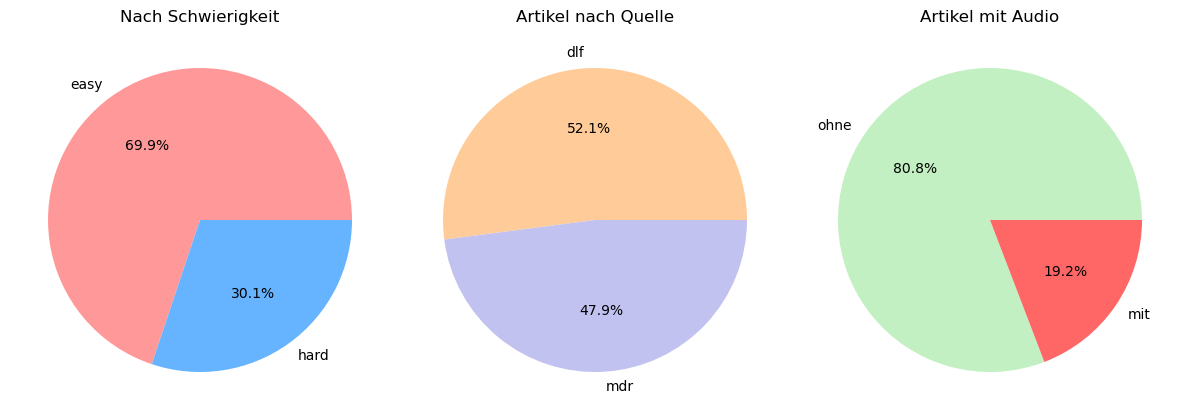

In [38]:
# Total number of articles
total_articles = df['article'].nunique()

# Plot settings
fig, axs = plt.subplots(1, 3, figsize=(12, 12))

# Number of articles by niveau
articles_by_niveau = df['niveau'].value_counts()
axs[0].pie(articles_by_niveau, labels=articles_by_niveau.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
axs[0].set_title('Nach Schwierigkeit')

# Number of articles by source
articles_by_source = df['source'].value_counts()
axs[1].pie(articles_by_source, labels=articles_by_source.index, autopct='%1.1f%%', colors=['#ffcc99','#c2c2f0','#ffb3e6'])
axs[1].set_title('Artikel nach Quelle')

# Number of articles with audio
articles_with_audio = df['has_audio'].value_counts()
articles_with_audio.index = ['ohne', 'mit']
axs[2].pie(articles_with_audio, labels=articles_with_audio.index, autopct='%1.1f%%', colors=['#c2f0c2','#ff6666'])
axs[2].set_title('Artikel mit Audio')

plt.tight_layout()
plt.savefig(os.path.join(image_dir, 'data_overview.png'))

Text(0, 0.5, 'Wörter')

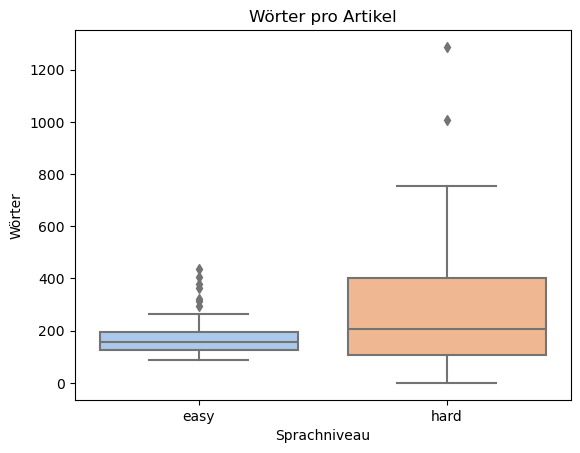

In [39]:
# Length difference between easy and hard articles using seaborn box plot
sns.boxplot(x='niveau', y='length', data=df, palette='pastel')
plt.title('Wörter pro Artikel')
plt.xlabel('Sprachniveau')
plt.ylabel('Wörter')

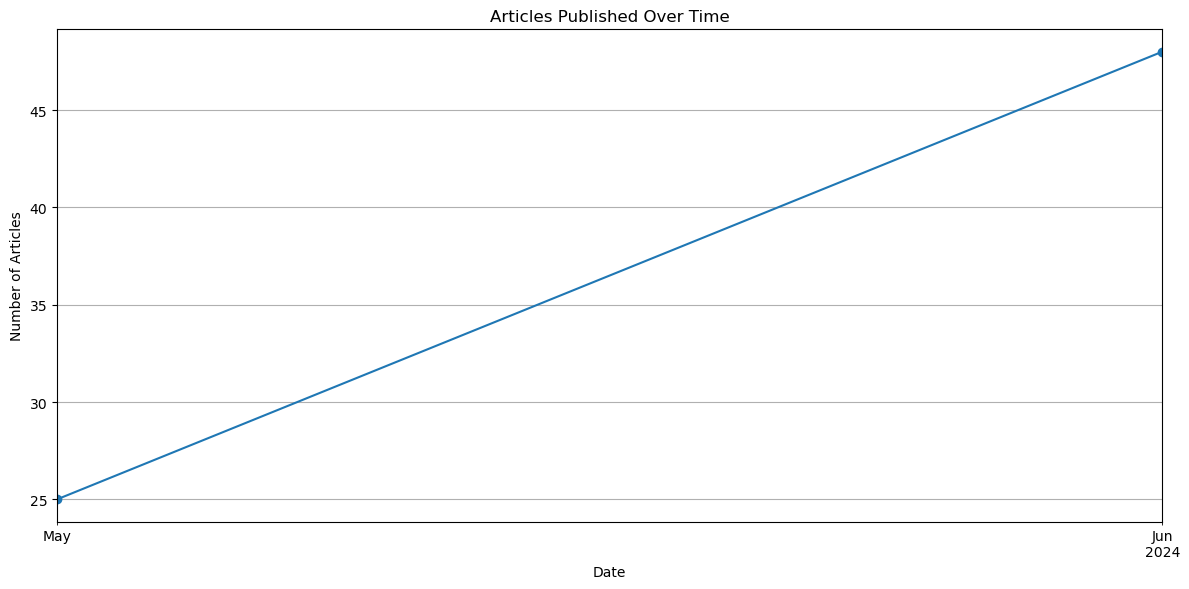

In [7]:
all_data['date'] = pd.to_datetime(all_data['date'])
articles_over_time = all_data.groupby(all_data['date'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
articles_over_time.plot(kind='line', marker='o', linestyle='-')
plt.title('Veröffentlichungsdatum')
plt.xlabel('Datum')
plt.ylabel('Anzahl Artikel')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(image_dir, 'articles_over_time.png'))
plt.show()